### Confidence Intervals - Part I

First let's read in the necessary libraries and the dataset.  You also have the full and reduced versions of the data available.  The reduced version is an example of you would actually get in practice, as it is the sample.  While the full data is an example of everyone in your population.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

coffee_full = pd.read_csv('coffee_dataset.csv')
coffee_red = coffee_full.sample(200) #this is the only data you might actually get in the real world.

In [2]:
coffee_red.head()

user_id   age  drinks_coffee     height
2402     2874   <21           True  64.357154
2864     3670  >=21           True  66.859636
2167     7441   <21          False  66.659561
507      2781  >=21           True  70.166241
1817     2875  >=21           True  71.369120

`1.` What is the proportion of coffee drinkers in the sample?  What is the proportion of individuals that don't drink coffee?

In [3]:
# proportion of coffee drinkers in the sample
coffee_red['drinks_coffee'].mean()

0.59499999999999997

In [4]:
# proportion of non-coffee drinkers in the sample
1 - coffee_red['drinks_coffee'].mean()

0.40500000000000003

`2.` Of the individuals who drink coffee, what is the average height? Of the individuals who do not drink coffee, what is the average height?

In [5]:
# avg height of coffee drinkers
coffee_red[coffee_red['drinks_coffee'] == True]['height'].mean()

68.119629908586163

In [6]:
# avg height of non-coffee drinkers
coffee_red[coffee_red['drinks_coffee'] == False]['height'].mean()

66.784922799278775

`3.` Simulate 200 "new" individuals from your original sample of 200.  What are the proportion of coffee drinkers in your bootstrap sample?  How about individuals that don't drink coffee?

In [7]:
bootstrap = coffee_red.sample(200, replace=True)
bootstrap.head()

user_id   age  drinks_coffee     height
93       2423  >=21           True  69.540052
1239     4172  >=21           True  71.011189
1756     5529  >=21           True  67.857414
879      2639  >=21           True  68.445535
944      4975  >=21          False  74.276003

In [8]:
# proportion of coffee drinkers in the sample
bootstrap['drinks_coffee'].mean()

0.60499999999999998

In [9]:
# proportion of individuals that don't drink coffee
1 - bootstrap['drinks_coffee'].mean()

0.39500000000000002

`4.` Now simulate your bootstrap sample 10,000 times and take the mean height of the non-coffee drinkers in each sample. Each bootstrap sample should be from the very first sample of 200 data points. Plot the distribution, and pull the values necessary for a 95% confidence interval.  What do you notice about the sampling distribution of the mean in this example?

In [10]:
boot_means =[]
for num in range(10000):
    bootstrap = coffee_red.sample(200, replace=True)
    bootmean = bootstrap[bootstrap['drinks_coffee'] == False]['height'].mean()
    boot_means.append(bootmean)

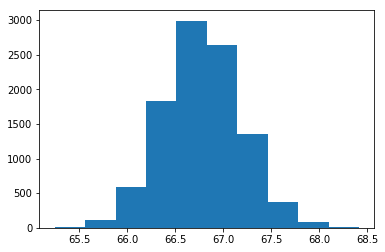

In [11]:
plt.hist(boot_means);

In [12]:
np.percentile(boot_means, 2.5), np.percentile(boot_means, 97.5)

(65.992913281575198, 67.584027382815719)

`5.`  Did your interval capture the actual average height of non-coffee drinkers in the population?  Look at the average in the population and the two bounds provided by your 95% confidence interval, and then answer the final quiz question below.

In [13]:
# mean height of non-coffee drinkers in the population
coffee_full[coffee_full['drinks_coffee'] == False]['height'].mean()

66.443407762147004

- The actual average height of non-coffee drinkers in the population is **66.4434**.
- Two bounds by 95% confidence interval is **65.9929** and **67.5840**.